## Importing packages

In [1]:
import scipy
import scipy.fft

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as ss

from scipy.optimize import curve_fit

## Exercise 1
### Importing data, identifying shape

In [2]:
dsA = np.loadtxt('SampleA.dat')
dsB = np.loadtxt('SampleB.dat')

In [3]:
print(f'A min, max = {dsA.min()}, {dsB.max()}, B min, max = {dsB.min()}, {dsB.max()}')
print(f'A shape = {dsA.shape}, B shape = {dsB.shape}')
print(f'SampleA mean is {dsA.mean()}\nSampleB mean is {dsB.mean()}\nSampleA variance is {dsA.std() ** 2}\nSampleB variance is {dsB.std() ** 2}')

A min, max = -6.4640756, 5.5781623, B min, max = -6.1459771, 5.5781623
A shape = (100,), B shape = (125,)
SampleA mean is -0.38399050043000005
SampleB mean is -0.22476804037599996
SampleA variance is 3.7965841727801366
SampleB variance is 3.6713467116498864


### Finding p-value for difference in means

In [4]:
t_stat, p_val = ss.ttest_ind(dsA, dsB, equal_var=False)
# Similar variances, either due to sample size or random propagation
# In this case, using a Welch's t-test produces a more statistically valid result.
print(t_stat, p_val)

-0.6107835428700016 0.5420013913801154


### Visualising data, comparing overlap vs. stacking

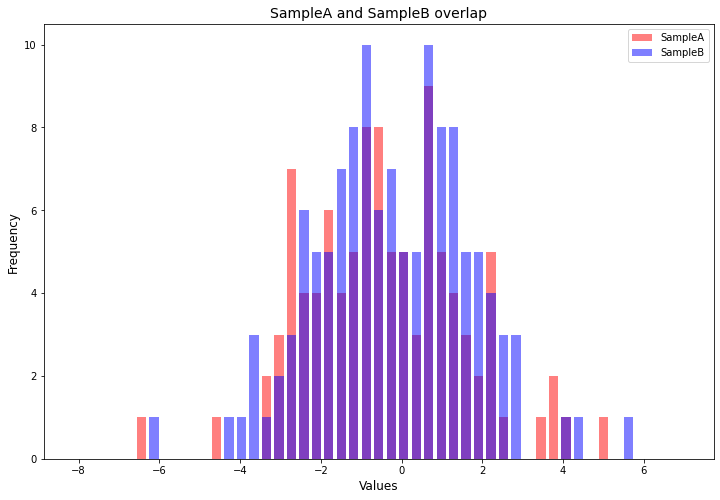

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

bins = np.linspace(np.min(dsB) - 2, np.max(dsA) + 2, 50)

ax.hist(dsA, bins, alpha=0.5, label='SampleA', color='r', rwidth=.75)
ax.hist(dsB, bins, alpha=0.5, label='SampleB', color='b', rwidth=.75)
ax.set_title('SampleA and SampleB overlap', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Values', fontsize=12)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('ex_1.png', dpi=300)

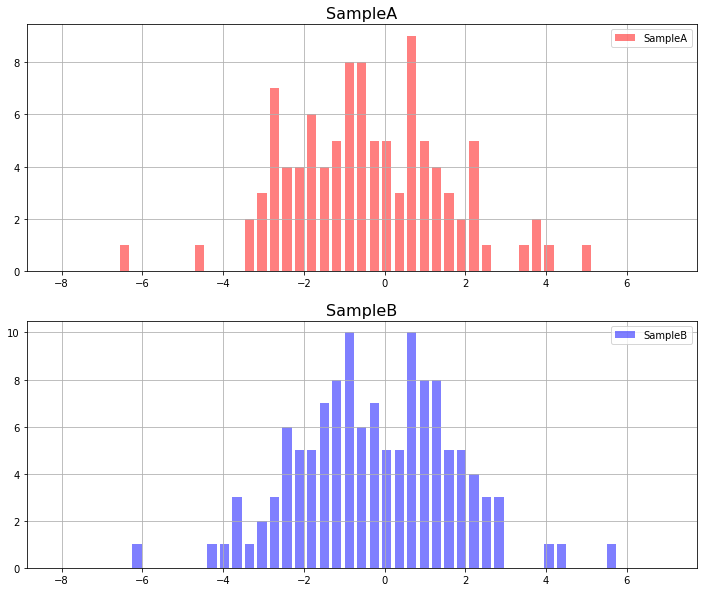

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

bins = np.linspace(np.min(dsB) - 2, np.max(dsA) + 2, 50)

axes[0].hist(dsA, bins, alpha=0.5, label='SampleA', color='r', rwidth=.75)
axes[1].hist(dsB, bins, alpha=0.5, label='SampleB', color='b', rwidth=.75)
axes[0].set_title('SampleA', fontsize=16)
axes[1].set_title('SampleB', fontsize=16)

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].grid(axis='both', linestyle='-')
axes[1].grid(axis='both', linestyle='-')
plt.show()

## Exercise 2
### Loading data, checking data shape and clearing NaN values

In [7]:
nat = np.loadtxt('natural.dat')
anth = np.loadtxt('anthropogenic.dat')

In [8]:
nat = nat[~np.isnan(nat)]
anth = anth[~np.isnan(anth)]
print(f'Shape of nat, anthr is {nat.shape}, {anth.shape}')
print(f'nat mean is {nat.mean()}\nanth mean is {anth.mean()}\nnat variance is {nat.std() ** 2}\nanth variance is {anth.std() ** 2}')

Shape of nat, anthr is (3214098,), (1140114,)
nat mean is -0.2660545508164363
anth mean is 0.7495723153198401
nat variance is 3.3267892846251743
anth variance is 3.356260543021727


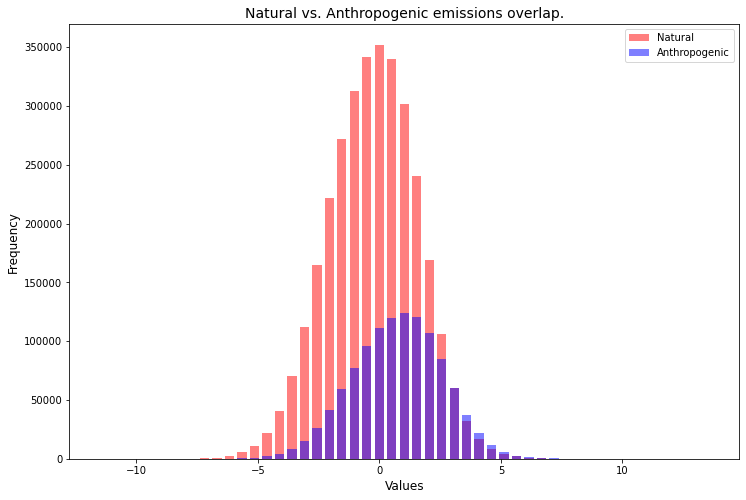

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

bins = np.linspace(np.min(nat) - 2, np.max(nat) + 2, 50)

ax.hist(nat, bins, alpha=0.5, label='Natural', color='r', rwidth=.75)
ax.hist(anth, bins, alpha=0.5, label='Anthropogenic', color='b', rwidth=.75)
ax.set_title('Natural vs. Anthropogenic emissions overlap.', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Values', fontsize=12)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('ex_2.png', dpi=300)

In [10]:
t_stat, p_val = ss.ttest_ind(nat, anth, equal_var=False)
# P value is low because of really large population size leads to resolving means, because
# getting a 0.0 p value leads to confirmation of mean resolution
t_stat, p_val

(-509.1607826795099, 0.0)

## Exercise 3
- Loading data.
- Plotting x vs y, x vs z.
- Fitting simple linear regression model to data, finding correlation coefficients.

In [11]:
ds = np.loadtxt('DAex3.dat')

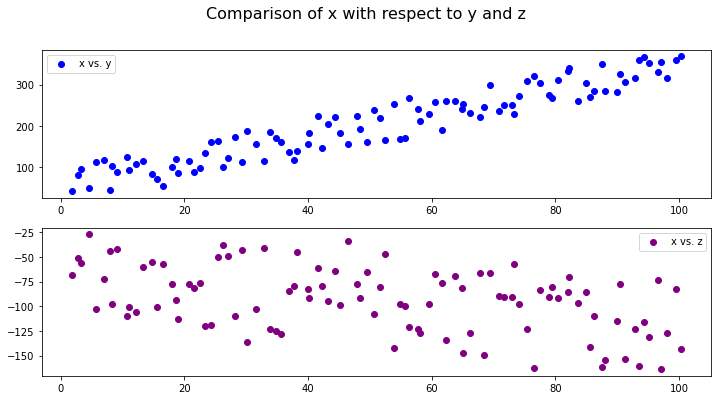

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(12,6))
axs[0].scatter(ds[:, 0], ds[:, 1], color='blue', label='x vs. y')
axs[1].scatter(ds[:, 0], ds[:, 2], color='purple', label='x vs. z')

for i in range(0,2):
    axs[i].legend()
    
fig.suptitle('Comparison of x with respect to y and z', fontsize=16)
plt.show()

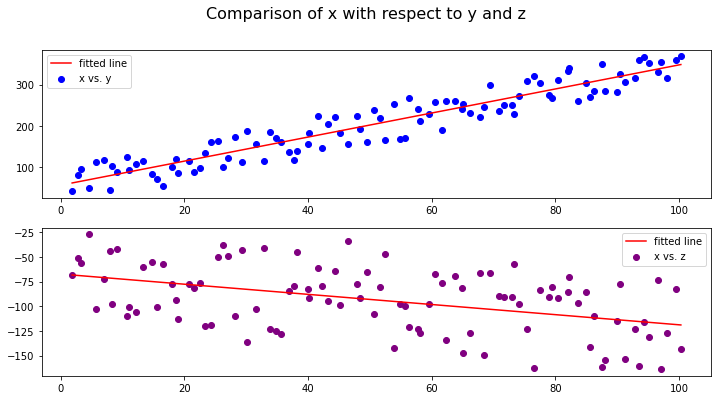

In [13]:
res_y = ss.linregress(ds[:,0], ds[:,1])
res_z = ss.linregress(ds[:,0], ds[:,2])

fig, axs = plt.subplots(2, 1, figsize=(12,6))
axs[0].scatter(ds[:, 0], ds[:, 1], color='blue', label='x vs. y')
axs[0].plot(ds[:,0], res_y.intercept + res_y.slope*ds[:,0], 'r', label='fitted line', c='red')
axs[1].scatter(ds[:, 0], ds[:, 2], color='purple', label='x vs. z')
axs[1].plot(ds[:,0], res_z.intercept + res_z.slope*ds[:,0], 'r', label='fitted line', c='red')

for i in range(0,2):
    axs[i].legend()
    
fig.suptitle('Comparison of x with respect to y and z', fontsize=16)
# plt.show()
plt.savefig('ex_3.png', dpi=300)

In [14]:
r_p = ss.pearsonr(ds[:, 1], ds[:, 2])
# Correlation coefficient shows a strong negative correlation
# Very small p value, (2nd in tuple) indicates high confidence level.
r_p

(-0.5218249595445775, 2.584595313218827e-08)

## Exercise 4
- Added given code to first cell below.
- Fitted function to random data generated.

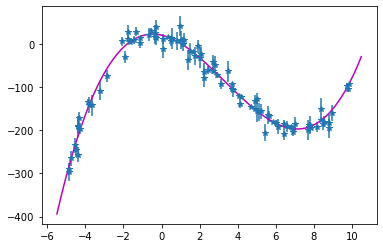

In [15]:
n = 100                   # number of data points
x = np.random.ranf(n)*15-5;        # random x data values in range -5 to 10 uniformly distibuted
xx = np.arange(-5.5,10.501,0.01)       # x vector to use for plotting
p = [1, -10, -10, 20]        # polynomial coefficients

y = np.polyval(p,x)          # y data values
sigma = np.random.rand(n)*25;      # random uniformly distributed uncertainties in range 0 to 25
error=np.random.normal(0.0,1.0,n)*sigma   # add gaussian-distributed random noise
y=y+error

#    plot the data points and the cubic polynomial

plt.figure()
plt.errorbar(x,y,xerrr=None,yerr=sigma,linestyle='none', marker='*')
plt.plot(xx,np.polyval(p,xx),'m-')
#    fit a 4-coefficient polynomial (i.e. a cubic) to the data
#    and quantify the quality of the fit
plt.show()

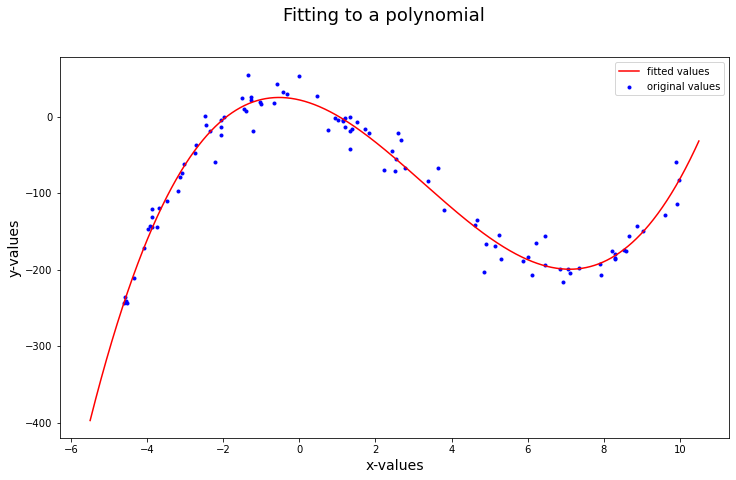

In [16]:
n = 100                   # number of data points
x = np.random.ranf(n)*15-5;        # random x data values in range -5 to 10 uniformly distibuted
xx = np.arange(-5.5,10.501,0.01)       # x vector to use for plotting
p = [1, -10, -10, 20]        # polynomial coefficients

y = np.polyval(p,x)          # y data values
sigma = np.random.rand(n)*25;      # random uniformly distributed uncertainties in range 0 to 25
error=np.random.normal(0.0,1.0,n)*sigma   # add gaussian-distributed random noise
y=y+error

# Here:
# residuals = sum of squared residuals, effective summed covariance matrix.
# rank = rank of polynomial
# singular_values = values of fit
# rcond = conditional cutoff value for fitting, defaults to 2.220446049250313e-14
fit, residuals, rank, singular_values, rcond = np.polyfit(x, y, 4, full=True)
# Using scipy's linregress to find an r_value
slope, intercept, r_value, p_value, std_err = ss.linregress(x, y)
fit = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y, label='original values', marker='.', color='blue')
ax.plot(xx, np.polyval(fit, xx), label='fitted values', color='red')
ax.set_ylabel('y-values', fontsize=14)
ax.set_xlabel('x-values', fontsize=14)
ax.legend()
fig.suptitle('Fitting to a polynomial', fontsize=18)
# plt.show()
plt.savefig('ex_4.png', dpi=300)

### Checking goodness of fit by $R^2$ value:

In [17]:
# Checking goodness of fit by R^2 value:
print(f'R^2 value: {r_value**2}, therefore {(r_value**2) * 100:.3f}%')

R^2 value: 0.14553592777119148, therefore 14.554%


This return means that only 30.549% of the data is covered by the polyfit function.   
In this case, it is likely due to the prevalence of outliers in the generated data.   
We can however see that visually the fitted function approximates the trend in the data well.

In [18]:
print(f'Singular values of fit: {singular_values}')
p = [1, -10, -10, 20]
print(f'Polynomial coefficients: {p}')
print(f'Rank of fit: {rank}')
print(f'Size of data: x={len(x)}, y={len(y)}')

Singular values of fit: [1.99959077 0.8558536  0.48486284 0.17550776 0.057065  ]
Polynomial coefficients: [1, -10, -10, 20]
Rank of fit: 5
Size of data: x=100, y=100


From above we can see that though polyval interpreted the function as one of rank 4, the $R^2$ value is low.   
Comparing the singular values of the fit with the coefficients of the function used to generate the data, we see a clear difference here,   
likely explaining the low % of the $R^2$, leading to poor data coverage. Though this is to be expected due to fitting data of size (100,100) with a line.

## Exercise 5
- Loading data, removing outliers
- Plotting data, fitting given temperature model with estimated parameters
- Fitting temperature function to dataset using curve_fit from scipy.stats.optimize

In [19]:
dat_1 = np.loadtxt('DAex5_data1.dat', skiprows=21)
dat_2 = np.loadtxt('DAex5_data2.dat', skiprows=21)

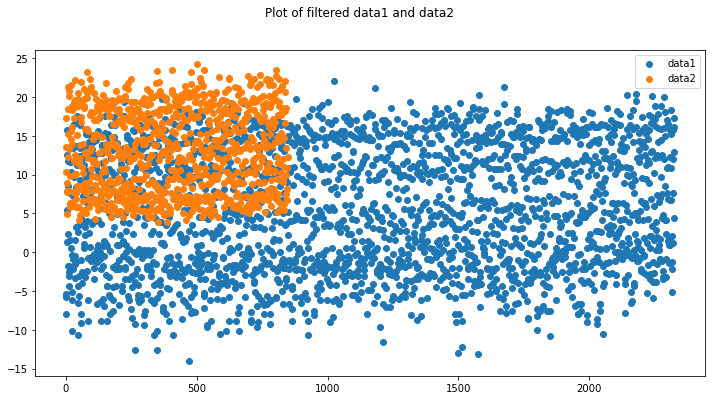

In [20]:
x1 = dat_1[:, 0]
y1 = dat_1[:, 1:]

x2 = dat_2[:, 0]
y2 = dat_2[:, 1:]


def remove_vals(ds):
    """ Iterate through entire input dataset and remove outliers, 
        in this case, the datasets had some occurrances of -99 values."""
    out = []
    for i in range(0, ds.shape[0]):
        for j in range(0, ds.shape[1]):
            val = ds[i, j]
            if val >= -60:
                out.append(val)
    return np.array(out)


def seas_temp(t, a, phi, b, c):
    """ Returns solution of: 𝑇(𝑡)=𝐴cos(2𝜋𝑓𝑡−𝜑)+𝐵𝑡+𝐶 """
    return a*np.cos((t*2*np.pi*(1/12)) - phi) +b*t +c 


y1_n = remove_vals(y1)
y2_n = remove_vals(y2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(np.arange(0, len(y1_n), 1), y1_n, label='data1')
ax.scatter(np.arange(0, len(y2_n), 1), y2_n, label='data2')
ax.legend()
fig.suptitle('Plot of filtered data1 and data2')
# plt.show()
plt.savefig('ex_5a.png', dpi=300)

Estimating the coefficients of the temperature model

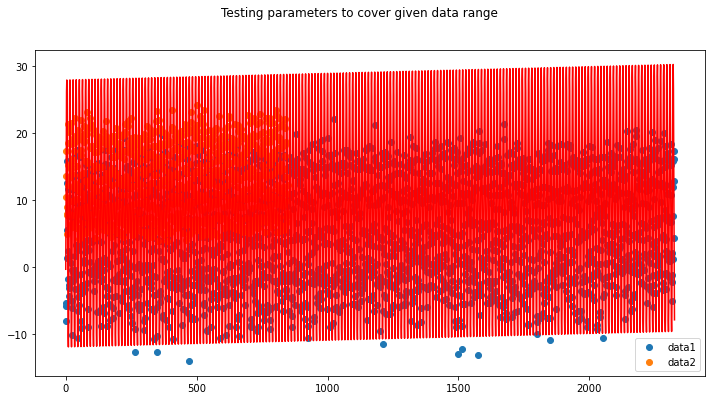

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
x_n = np.arange(0, len(y1_n), 1)
# seas_temp(t, A, phi, B, C)
y = seas_temp(x_n, 20, 2, 0.001, 8)
ax.scatter(x_n, y1_n, label='data1')
ax.scatter(np.arange(0, len(y2_n), 1), y2_n, label='data2')
ax.plot(x_n, y, color='red')
ax.legend()
fig.suptitle('Testing parameters to cover given data range')
# plt.show()
plt.savefig('ex_5b.png', dpi=300)

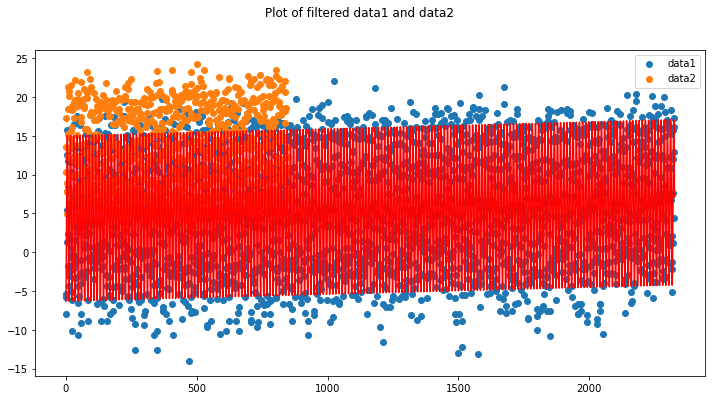

In [22]:
# Using curve fit on y1 only, since y1 spans entire data range.
popt, pcov = curve_fit(seas_temp, x_n, y1_n, p0=[20, 2, 0.001, 8])
# pcov is the uncertainty matrix of inputted coefficients

fig, ax = plt.subplots(figsize=(12, 6))
x_n = np.arange(0, len(y1_n), 1)
# seas_temp(t, A, phi, B, C)
y = seas_temp(x_n, 100, 200, 0.01, 100)
ax.scatter(x_n, y1_n, label='data1')
ax.scatter(np.arange(0, len(y2_n), 1), y2_n, label='data2')
ax.plot(x_n, seas_temp(x_n, *popt), color='red')
ax.legend()
fig.suptitle('Plot of filtered data1 and data2')
# plt.show()
plt.savefig('ex_5c.png', dpi=300)

## Exercise 6
- Adding given code.
- Finding base frequencies from fourier transform.
- Plotting base frequencies over the given signal noise.

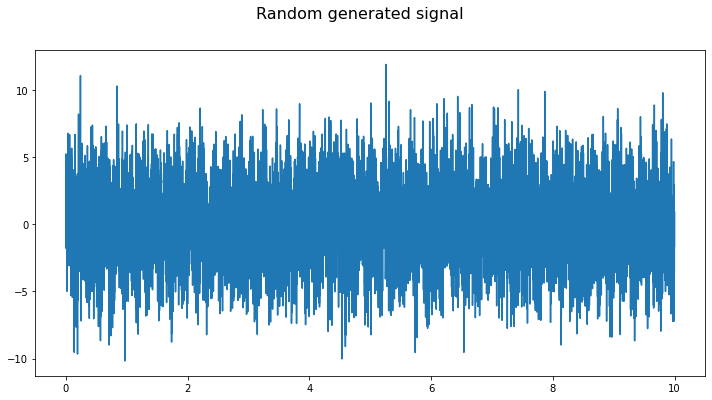

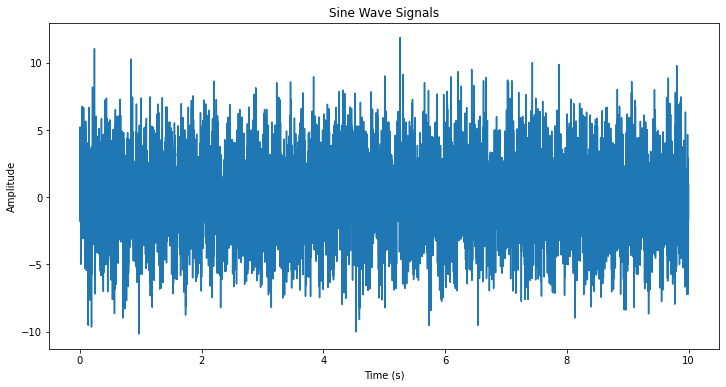

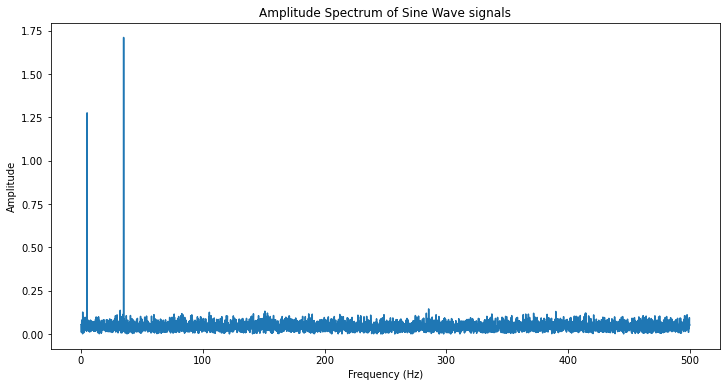

In [23]:
fs = 1000.0 # sampling frequency (Hz) 
ts = 1/fs # set sampling rate and interval
period=10.0 #sampling period
nfft = period/ts # length of DFT
t=np.arange(0,period,ts)
h = ((1.3)*np.sin(2*np.pi*5.0*t) + (1.7)*np.sin((2*np.pi*35.0*t)-0.6) + (2.5)*np.random.normal(0.0,1.0,t.shape))          
# combination of a 5 Hz signal a 35Hz signal and Gaussian noise

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t,h)
fig.suptitle('Random generated signal', fontsize=16)
plt.show()

H = np.fft.fft(h) # determine the Discrte Fourier Transform

# Take the magnitude of fft of H
mx = abs(H[0:int(nfft/2)])*(2.0/nfft)  # note only need to examien first half of spectrum
# Frequency vector
f = np.arange(0,int(nfft/2))*fs/nfft

plt.figure(2, figsize=(12,6))
plt.plot(t,h);
plt.title('Sine Wave Signals');
plt.xlabel('Time (s)');
plt.ylabel('Amplitude');
plt.figure(3, figsize=(12,6))
plt.plot(f,mx)
plt.title('Amplitude Spectrum of Sine Wave signals');
plt.xlabel('Frequency (Hz)');
plt.ylabel('Amplitude');
plt.show()

In [24]:
out = np.array(list(reversed(sorted(mx))))
out_freqs = []

for val in out[:2]:
    out_freqs.append(f[np.where(val == mx)])
    
out_freqs

[array([35.]), array([5.])]

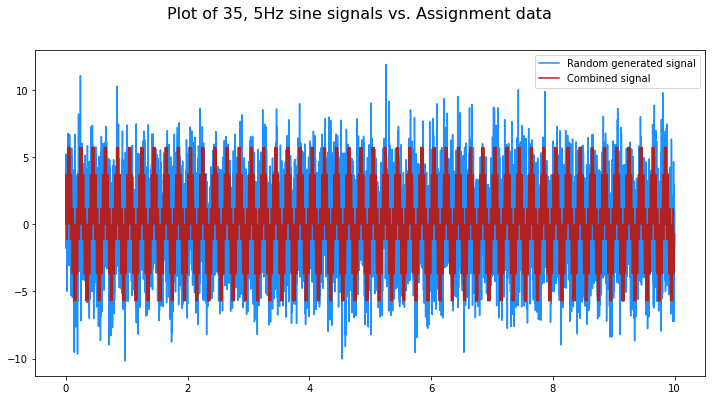

In [25]:
t = np.arange(0,period,ts)
y_ = (3)*np.sin(2*np.pi*5.0*t) + (3)*np.sin((2*np.pi*35.0*t))

fig, ax = plt.subplots(figsize=(12, 6))

fig.suptitle('Plot of 35, 5Hz sine signals vs. Assignment data', fontsize=16)
ax.plot(t,h, label='Random generated signal', c='dodgerblue')
ax.plot(t, y_, label='Combined signal', c='firebrick')
ax.legend()

# At the right amplitude, we can see that the combined signal found from the fourier transform closely matches the random data.
# In this case, Gaussian noise was used to mask the signal of the random data, but the fourier transform still showed the
# sampling frequency
# plt.show()
plt.savefig('ex_6a.png', dpi=300)

### Examining the Nyquist frequency
We know that mathematically, $f_s>2f_m$ the sampling frequency fs has to be larger than twice the maximum frequency in the signal.   
In this case, for a 35Hz signal, the sampling frequency must be at least larger than 70, where we see a folding of the 35Hz signal prior to this.   
By looking at the respective fourier transforms, we can see that we get a wrong signal of 30Hz when the sampling rate is less than 70.   
This is likely the case of the sine wave 'folding' due to too low a sampling rate.

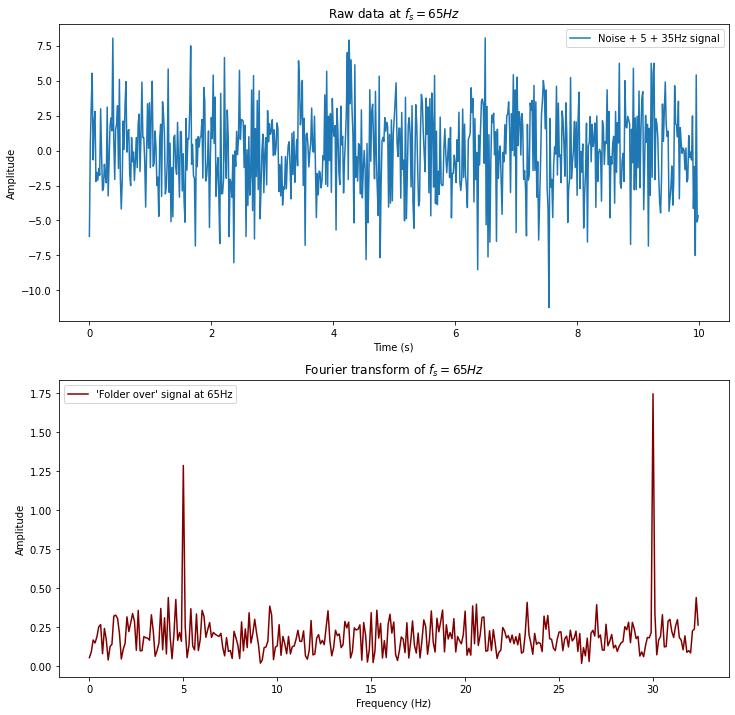

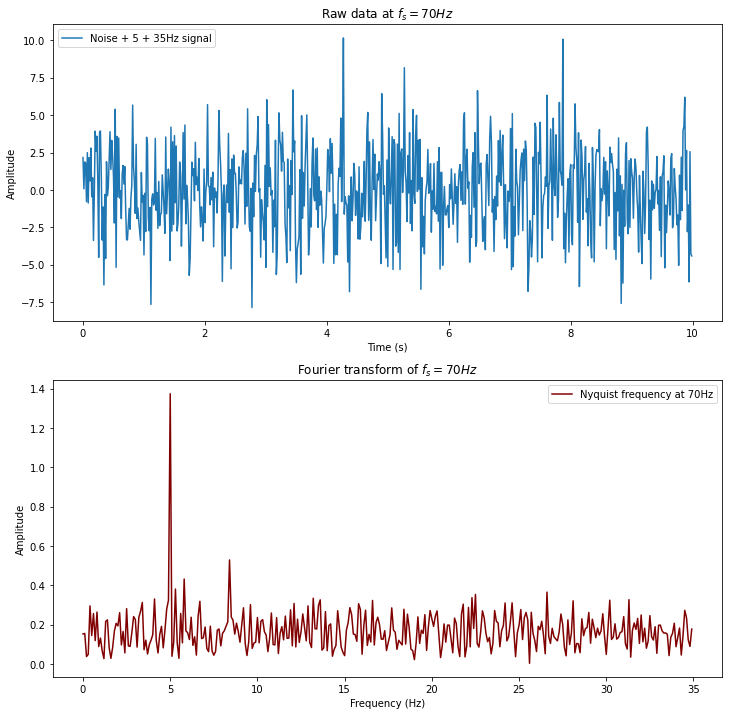

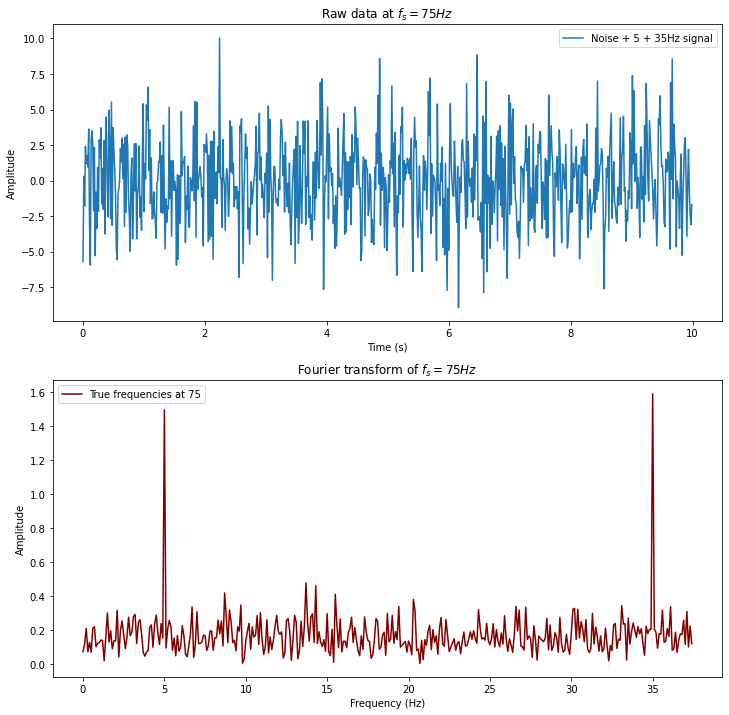

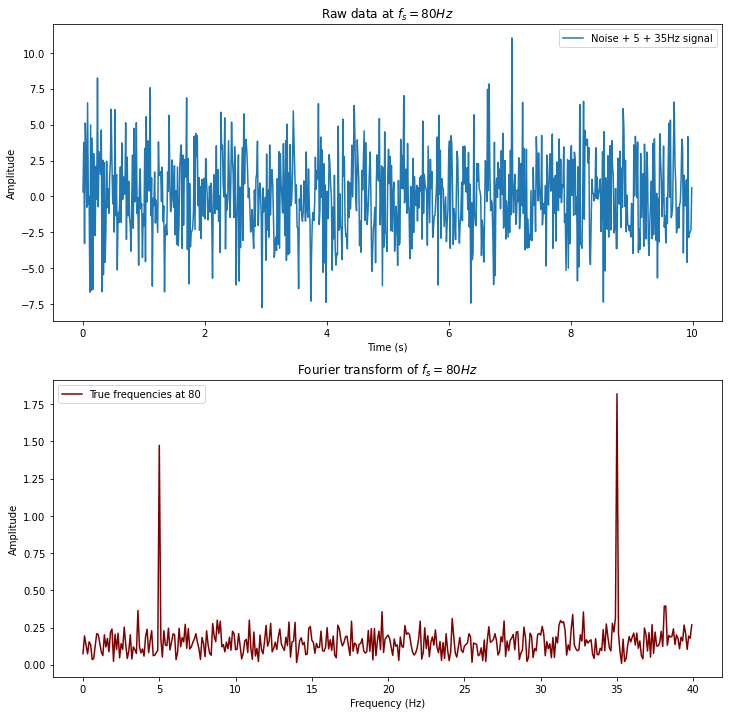

In [29]:
savedict = {0:'b', 1:'c', 2:'d', 3:'e'}
for i, freq in enumerate(np.arange(65, 85, 5)):
    labeldict = {'less':f'\'Folder over\' signal at {freq}Hz', 'equal':f'Nyquist frequency at {freq}Hz', 'greater':f'True frequencies at {freq}'}
    
    fs = freq # sampling frequency (Hz) 
    ts = 1/fs # set sampling rate and interval
    period=10.0 #sampling period
    nfft = period/ts # length of DFT
    t=np.arange(0,period,ts)
    h = ((1.3)*np.sin(2*np.pi*5.0*t) + (1.7)*np.sin((2*np.pi*35.0*t)-0.6) + (2.5)*np.random.normal(0.0,1.0,t.shape))          
    # combination of a 5 Hz signal a 35Hz signal and Gaussian noise

    H = np.fft.fft(h) # determine the Discrte Fourier Transform

    # Take the magnitude of fft of H
    mx = abs(H[0:int(nfft/2)])*(2.0/nfft)  # note only need to examien first half of spectrum
    # Frequency vector
    f = np.arange(0,int(nfft/2))*fs/nfft

    fig, ax = plt.subplots(2, 1, figsize=(12, 12))
    ax[0].plot(t,h, label='Noise + 5 + 35Hz signal')
    ax[0].set_title(f'Raw data at $f_s={freq}Hz$')
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    ax[0].legend()
    
    if freq <70:
        ax[1].plot(f,mx, label=labeldict['less'], color='maroon')
    elif freq == 70:
        ax[1].plot(f,mx, label=labeldict['equal'], color='maroon')
    else:
        ax[1].plot(f,mx, label=labeldict['greater'], color='maroon')
    
    ax[1].set_title(f'Fourier transform of $f_s={freq}Hz$')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].legend()
#     plt.show()
    plt.savefig(f'ex_6{savedict[i]}.png', dpi=300)

## Exercise 7
- Read in data, plot raw data
- Find dominant cycle using fourier transform

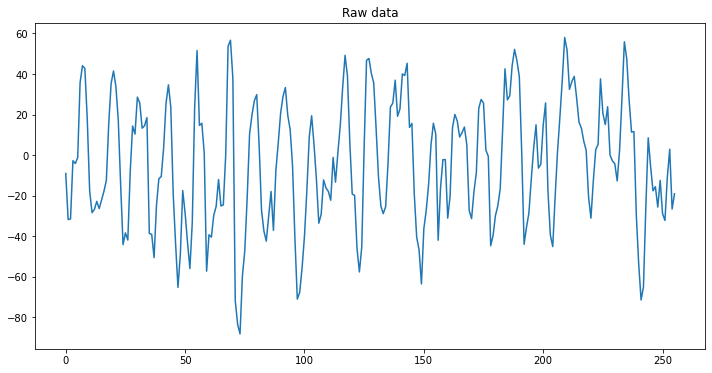

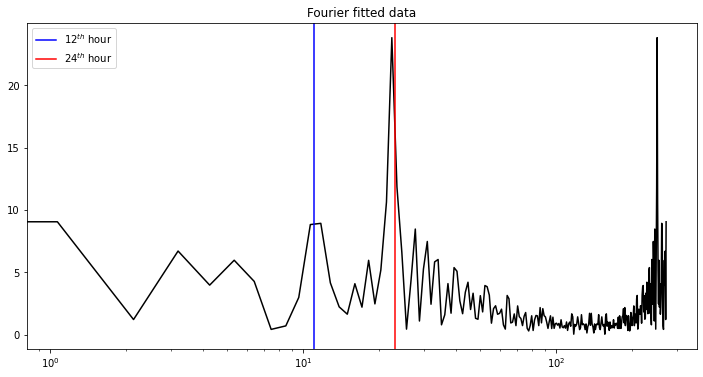

In [27]:
ds = np.loadtxt('DAex7data.txt')
x = ds[:, 0]
y = ds[:, 1]

fig, ax = plt.subplots(figsize=(12,6))
plt.title('Raw data')
ax.plot(x, y)
# plt.show()
plt.savefig('ex_7a.png', dpi=300)

# Fourier transform to convert y to frequency domain.
y_vals = scipy.fft.fft(y)
x_vals = x
# Scaling y vector by 2/nfft, nfft=256 (len(y)).
y_vals = abs(y_vals) * 2/256
# Scaling x by nfft/fs, fs = sampling frequency = 10 days, 24h each.
x_vals *= 256/240

fig, ax = plt.subplots(figsize=(12,6))
plt.title('Fourier fitted data')
ax.plot(x_vals, y_vals, color='black')
# 12th and 24th hours are at 11 and 23 indices, since x starts at 0.
ax.axvline(11, color='blue', label='$12^{th}$ hour')
ax.axvline(23, color='red', label='$24^{th}$ hour')
# Logarithmic x-axis
ax.set_xscale('log')
ax.legend()
# plt.show()
plt.savefig('ex_7b.png', dpi=300)
